##### Config

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Disable annoying font warnings
matplotlib.font_manager._log.setLevel(50)

# Disable theano deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='theano')

# Style
plt.style.use('default')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 14
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']
plt.rcParams['font.cursive'] = ['Liberation Sans']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.fallback_to_cm'] = True

In [4]:
del matplotlib; del plt; del warnings

##### Main

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.special import factorial
from utils import g

In [6]:
np.random.seed(0)

# Dimension of the problem
K = 3

# Order we will go up to
N = 10

# Random covariance and its Cholesky decomp.
L = 0.1 * np.tril(0.25 * np.random.randn(K, K) + np.eye(K))
Sig = L @ L.T

# Mean of all coefficients in the covariance
barSig = np.mean(Sig)

# Ones vector & matrix
j = np.ones((K, 1))
J = np.ones((K, K))

Analytic expression for $\mathbf{R}_n$:

In [7]:
def R(n):
    return (n * (n + 1) * g(n) / K ** n) * np.linalg.matrix_power(
        Sig @ J, n // 2
    ) @ Sig + (n + 1) * g(n) * barSig ** (n // 2) * Sig


R_analytic = np.array([R(n) for n in np.arange(N)])

Numerical estimate of $\mathbf{R}_n$:

In [8]:
# Number of samples we'll draw
M = 1000000

r = np.empty((N, K, K, M))
for m in tqdm(range(M)):
    u = np.random.randn(K, 1)

    for n in range(N):
        r[n, :, :, m] = (n + 1) / K ** n * ((j.T @ L @ u) ** n * (L @ u @ u.T @ L.T))

R_numerical = np.mean(r, axis=-1)

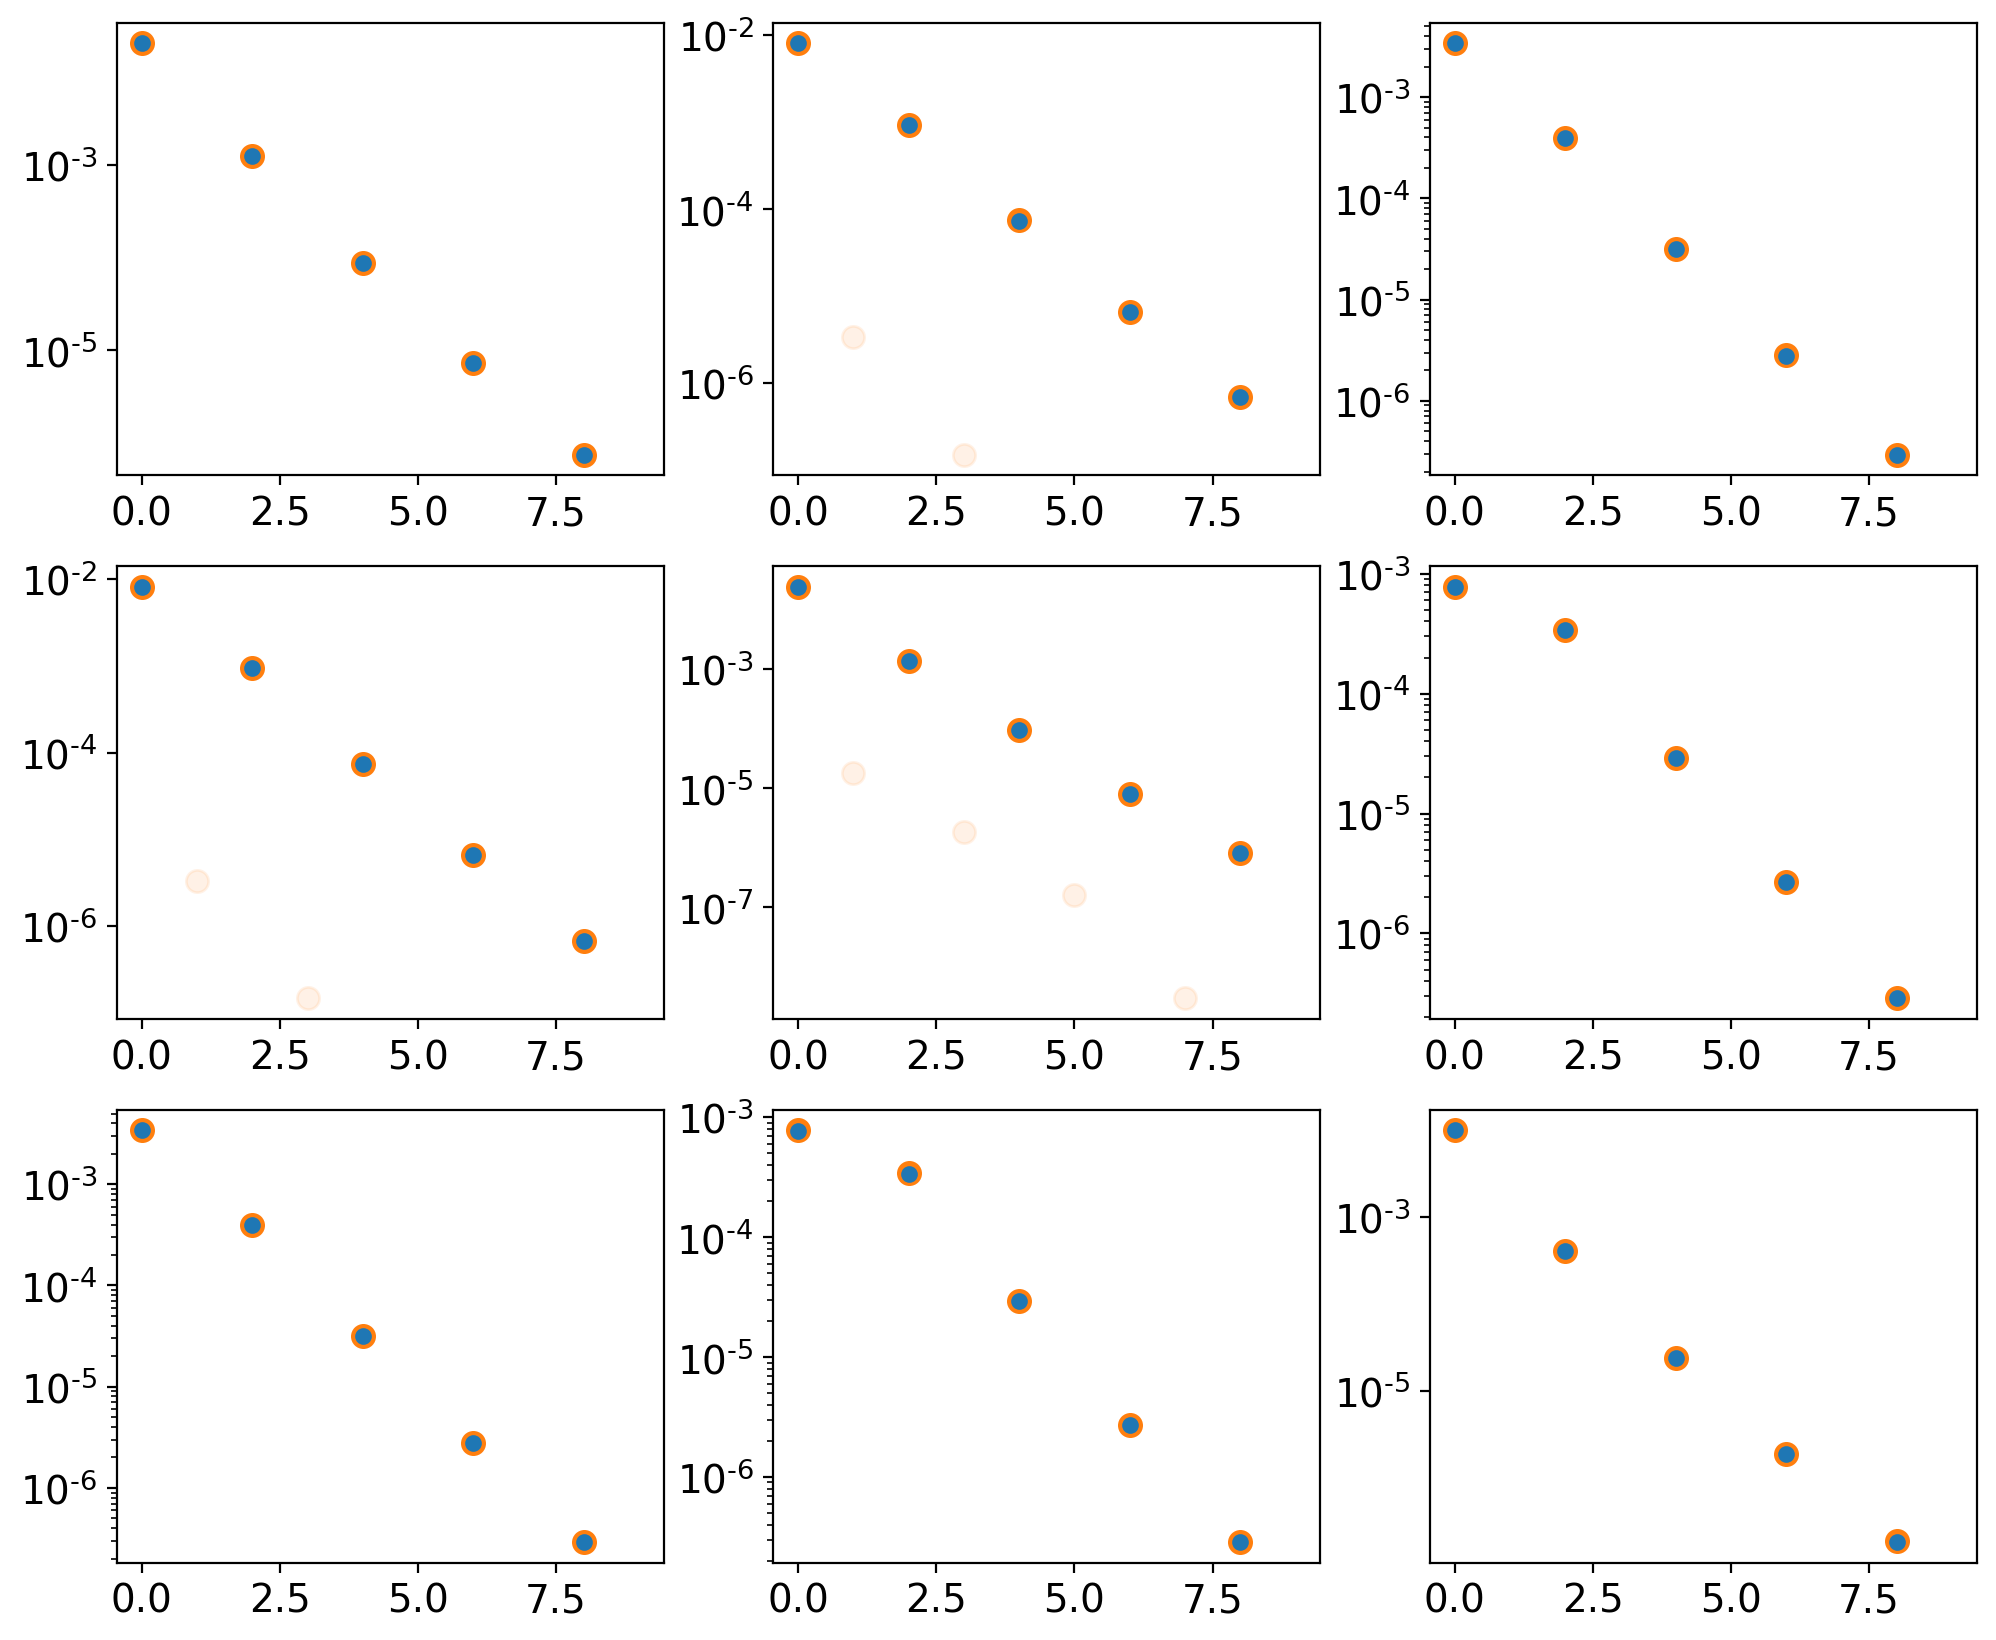

In [9]:
fig, ax = plt.subplots(K, K, figsize=(12, 10))
n = np.arange(N)
for k1 in range(K):
    for k2 in range(K):
        ax[k1, k2].plot(n[::2], R_numerical[:, k1, k2][::2], "o", ms=8, color="C1")
        ax[k1, k2].plot(
            n[1::2], R_numerical[:, k1, k2][1::2], "o", ms=8, color="C1", alpha=0.1
        )
        ax[k1, k2].plot(n, R_analytic[:, k1, k2], "o", ms=5, color="C0")
        ax[k1, k2].set_yscale("log")